Canny EdgeDetection es un algoritmo popular de detección de bordes. Fue desarrollado por John F. Canny en

Es un algoritmo de varias etapas y pasaremos por cada una de ellas.
Reducción de ruido

Dado que la detección de bordes es susceptible al ruido en la imagen, el primer paso es eliminar el ruido de la imagen con un filtro gaussiano de 5x5. Esto ya lo hemos visto en capítulos anteriores.

Encontrar el gradiente de intensidad de la imagen

Luego, la imagen suavizada se filtra con un kernel de Sobel tanto en dirección horizontal como vertical para obtener la primera derivada en dirección horizontal (GRAMOX) y dirección vertical (GRAMOy). A partir de estas dos imágenes, podemos encontrar el gradiente del borde y la dirección de cada píxel de la siguiente manera:

Supresión no máxima

Después de obtener la magnitud y dirección del gradiente, se realiza un escaneo completo de la imagen para eliminar los píxeles no deseados que no constituyan el borde. Para ello, en cada píxel se comprueba si es un máximo local en su vecindad en la dirección del gradiente. Mira la imagen a continuación:

El punto A está en el borde (en dirección vertical). La dirección del degradado es normal al borde. Los puntos B y C están en direcciones de gradiente. Entonces el punto A se verifica con el punto B y C para ver si forma un máximo local. Si es así, se considera para la siguiente etapa; de lo contrario, se suprime (se pone a cero).

En resumen, el resultado que se obtiene es una imagen binaria con "bordes finos".

Umbral de histéresis

Esta etapa decide cuáles son todas las aristas que son realmente aristas y cuáles no. Para ello, necesitamos dos valores de umbral, minVal y maxVal. Cualquier borde con un gradiente de intensidad superior a maxVal seguramente será borde y aquellos por debajo de minVal seguramente no serán bordes, por lo que se descartan. Aquellos que se encuentran entre estos dos umbrales se clasifican como bordes o no bordes según su conectividad. Si están conectados a píxeles de "borde seguro", se consideran parte de los bordes. En caso contrario, también se descartan. Vea la imagen a continuación:
El borde A está por encima del maxVal, por lo que se considera "borde seguro". Aunque el borde C está por debajo de maxVal, está conectado al borde A, por lo que también se considera un borde válido y obtenemos esa curva completa. Pero el borde B, aunque está por encima de minVal y está en la misma región que el borde C, no está conectado a ningún "borde seguro", por lo que se descarta. Por eso es muy importante que seleccionemos minVal y maxVal en consecuencia para obtener el resultado correcto.

Esta etapa también elimina los ruidos de pequeños píxeles suponiendo que los bordes son líneas largas.

Entonces, lo que finalmente obtenemos son bordes fuertes en la imagen.

Detección de bordes astuta en OpenCV

OpenCV pone todo lo anterior en una sola función, cv.Canny() . Veremos cómo usarlo. El primer argumento es nuestra imagen de entrada. El segundo y tercer argumento son nuestro minVal y maxVal respectivamente. El cuarto argumento es tamaño_apertura. Es el tamaño del kernel de Sobel utilizado para buscar gradientes de imágenes. Por defecto es 3. El último argumento es L2gradient, que especifica la ecuación para encontrar la magnitud del gradiente. Si es Verdadero, usa la ecuación mencionada anteriormente que es más precisa, en caso contrario usa esta función:midgramoe _ grado r a dyo n t _( GRAMO ) = |GRAMOX| + |GRAMOy|. Por defecto, es Falso.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Exercises

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



In [2]:
def on_trackbar_low(val):
    global low_threshold
    low_threshold = val
    update_canny()

In [3]:

def on_trackbar_high(val):
    global high_threshold
    high_threshold = val
    update_canny()


In [4]:

def update_canny():
    global img, low_threshold, high_threshold
    edges = cv.Canny(img, low_threshold, high_threshold)
    plt.subplot(122), plt.imshow(edges, cmap='gray')
    plt.title('Imagen de borde'), plt.xticks([]), plt.yticks([])
    plt.show()


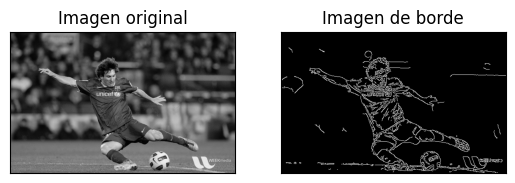

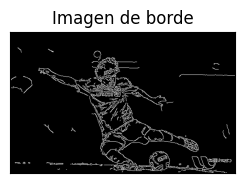

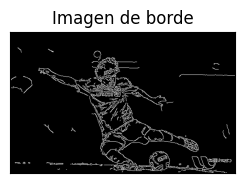

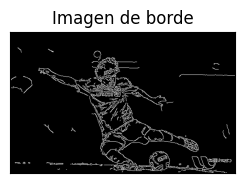

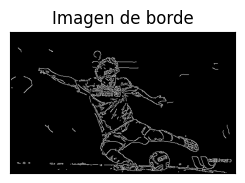

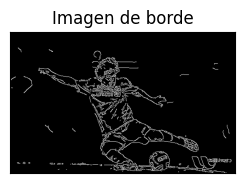

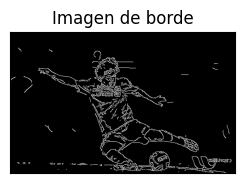

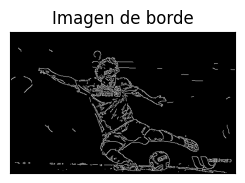

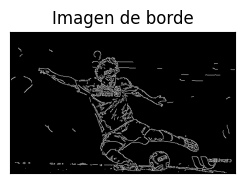

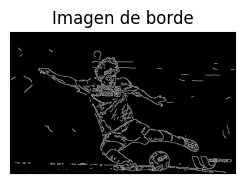

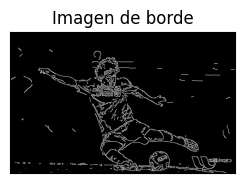

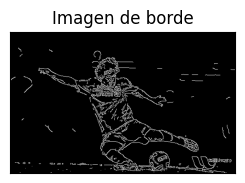

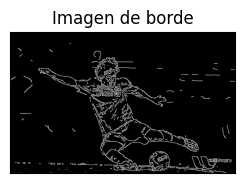

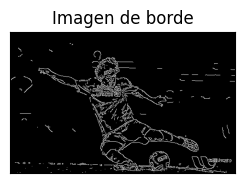

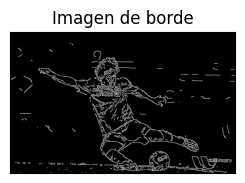

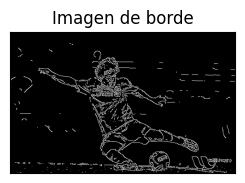

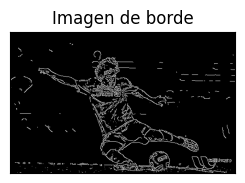

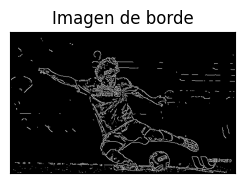

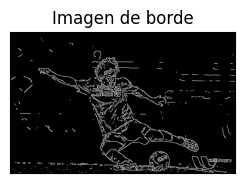

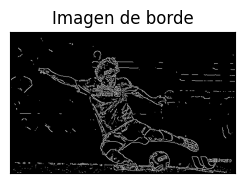

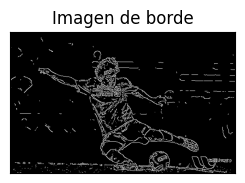

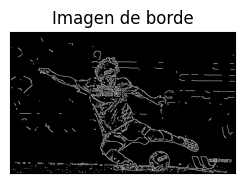

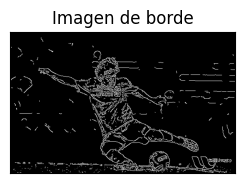

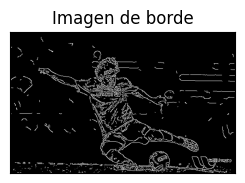

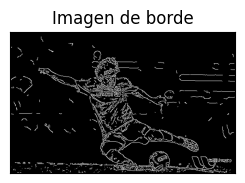

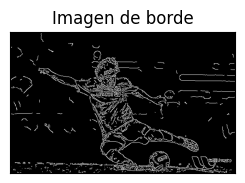

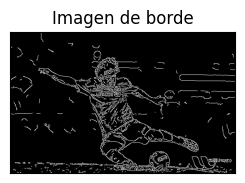

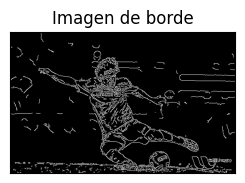

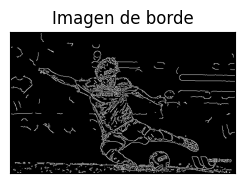

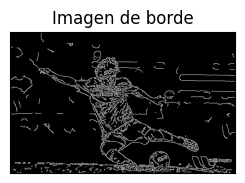

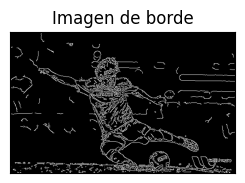

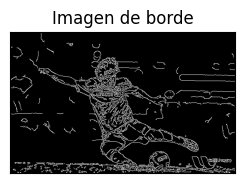

KeyboardInterrupt: 

In [5]:
# Cargar la imagen
img = cv.imread('resources/messi5.jpg', cv.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if img is None:
    print("No se pudo leer el archivo, verifique con os.path.exists()")
else:
    # Inicializar valores de umbral
    low_threshold = 100
    high_threshold = 200

    # Crear la ventana de la imagen original
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Imagen original'), plt.xticks([]), plt.yticks([])

    # Crear barras de seguimiento
    cv.namedWindow('Canny Edge Detection')
    cv.createTrackbar('Low Threshold', 'Canny Edge Detection', low_threshold, 255, on_trackbar_low)
    cv.createTrackbar('High Threshold', 'Canny Edge Detection', high_threshold, 255, on_trackbar_high)

    # Mostrar la imagen de borde inicial
    update_canny()

    # Esperar a que se presione la tecla 'esc' para salir
    while True:
        k = cv.waitKey(1) & 0xFF
        if k == 27:  # Presionar 'esc' para salir
            break

    cv.destroyAllWindows()
